# Определение перспективного тарифа для телеком компании


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [5]:
df_list = ['calls','internet','messages','tariffs','users']
df_dict = {}
for name in df_list:
    try:
        df_dict[name] = pd.read_csv(f'datasets/{name}.csv')  # Локальный путь
    except:
        df_dict[name] = pd.read_csv(f'/datasets/{name}.csv')  # Серверный путь
    print(name)
    df_dict[name].info()
    print()

calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 12303

In [6]:
for name in df_list:
    print(name)
    display(df_dict[name].head())
    print()

calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
for name in df_list:
    print(name)
    display(df_dict[name].isna().sum())
    print()

calls


id           0
call_date    0
duration     0
user_id      0
dtype: int64


internet


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


messages


id              0
message_date    0
user_id         0
dtype: int64


tariffs


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


users


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [8]:
# Проверка на дубликаты

for name in df_list:
    print(name)
    display(df_dict[name].duplicated().sum())
    print()

calls


0


internet


0


messages


0


tariffs


0


users


0

### Вывод

- Таблица users:
Во всех столбцах тип данных соттветствует данным, кроме 'churn_date'- есть пропуски, далее не потребуется- тип данных оставляем
- Таблица calls:
Во всех столбцах тип данных соттветствует данным, кроме 'call_date' — тип нужно приводить к формату дата
- Таблица messages:
Во всех столбцах тип данных соттветствует данным, кроме 'message_date' — тип нужно приводить к формату дата
- Таблица internet:
Во всех столбцах тип данных соттветствует данным, кроме 'session_date' — тип нужно приводить к формату дата;
столбец 'Unnamed: 0'- соответствует индексу, похоже артифакт или порядковфй номер (нам не нужен)- удаляем
- Таблица tariffs:
Во всех столбцах тип данных соттветствует данным


Дубликаты не обнаружены

## Шаг 2. Подготовьте данные

In [9]:
df_dict['calls'].rename(columns = {'call_date':'date'}, inplace = True)
df_dict['calls'].rename(columns = {'duration':'call_len'}, inplace = True)
df_dict['messages'].rename(columns = {'message_date':'date'}, inplace = True)
df_dict['internet'].rename(columns = {'session_date':'date'}, inplace = True)
df_dict['internet'].drop('Unnamed: 0', axis=1, inplace=True)
df_dict['calls'].head()

,id,date,call_len,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
cmi = ['calls','internet','messages']
for name in cmi:
    df_dict[name]['date'] = pd.to_datetime(df_dict[name]['date'],format='%Y.%m.%d')
    df_dict[name].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        202607 non-null  object        
 1   date      202607 non-null  datetime64[ns]
 2   call_len  202607 non-null  float64       
 3   user_id   202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       149396 non-null  object        
 1   mb_used  149396 non-null  float64       
 2   date     149396 non-null  datetime64[ns]
 3   user_id  149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 ent

In [11]:
#Объеденяем user_id и месяц

for name in cmi:
    df_dict[name]['month']  =  pd.DatetimeIndex(pd.to_datetime(df_dict[name]['date'],format='%Y.%m.%d')).month
    df_dict[name].rename(columns = {'id':f'id_{name}'}, inplace = True)
    print(name)
    display(df_dict[name].head())
    print()
     


calls


,id_calls,date,call_len,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12



internet


,id_internet,mb_used,date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9



messages


,id_messages,date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [12]:

calls_0 = df_dict['calls'].query('call_len == 0')['call_len'].count()
internet_0 = df_dict['internet'].query('mb_used == 0')['mb_used'].count()

print(f"нулевых звонков - {calls_0}, доля от общего кол-ва записей - {calls_0/len(df_dict['calls'])}")
print(f"нулевых интернет-сессий - {internet_0}, доля от общего кол-ва записей - {internet_0/len(df_dict['internet'])}")


нулевых звонков - 39613, доля от общего кол-ва записей - 0.19551644316336553
нулевых интернет-сессий - 19598, доля от общего кол-ва записей - 0.13118155773916304


### Выводы
- Нулевые звонки- это либо входящие либо недозвон абоненту
- Нулевые интернет-сессии - это могут быть заходы на бесплатные ресурсы, трафик к которым обнуляется на стороне билинга (например, сайты правительства РФ), данная гипотеза основана на наличии в данных 2х знаков после запятой.
- Не вижу смысла обрабатывать эти нулевые значения,т.к. они не тарифицируются и на прибыльность никак не сказываются




### Расчет данных по пользователям

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [13]:
# Округление звонков и интернет-сессий вверх
c_i ={'calls': 'call_len', 'internet': 'mb_used'}

for k,v in c_i.items():
    df_dict[k][v] = df_dict[k][v].apply(np.ceil)
    print(k)
    display(df_dict[k].head())
    print()


calls


,id_calls,date,call_len,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12



internet


,id_internet,mb_used,date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


In [14]:
calls = df_dict['calls'].groupby(['user_id','month'])['call_len'].agg(['count','sum'])
sms = df_dict['messages'].groupby(['user_id','month'])['id_messages'].agg(['count'])
internet = df_dict['internet'].groupby(['user_id','month'])['mb_used'].agg(['sum'])
'calls',calls, 'sms', sms, 'internet',internet


('calls',
                count    sum
 user_id month              
 1000    5         22  159.0
         6         43  172.0
         7         47  340.0
         8         52  408.0
         9         58  466.0
 ...              ...    ...
 1498    10        41  247.0
 1499    9          9   70.0
         10        68  449.0
         11        74  612.0
         12        69  492.0
 
 [3174 rows x 2 columns],
 'sms',
                count
 user_id month       
 1000    5         22
         6         60
         7         75
         8         81
         9         57
 ...              ...
 1498    10        42
 1499    9         11
         10        48
         11        59
         12        66
 
 [2717 rows x 1 columns],
 'internet',
                    sum
 user_id month         
 1000    5       2256.0
         6      23257.0
         7      14016.0
         8      14070.0
         9      14581.0
 ...                ...
 1498    10     20604.0
 1499    9       1848.0
         1

In [15]:
calls.rename(columns = {'count':'call_count', 'sum': 'minut_sum'}, inplace = True) 
sms.rename(columns = {'count':'sms_count'}, inplace = True) 
internet.rename(columns = {'sum': 'mb_sum'}, inplace = True) 
'calls',calls, 'sms', sms, 'internet',internet

('calls',
                call_count  minut_sum
 user_id month                       
 1000    5              22      159.0
         6              43      172.0
         7              47      340.0
         8              52      408.0
         9              58      466.0
 ...                   ...        ...
 1498    10             41      247.0
 1499    9               9       70.0
         10             68      449.0
         11             74      612.0
         12             69      492.0
 
 [3174 rows x 2 columns],
 'sms',
                sms_count
 user_id month           
 1000    5             22
         6             60
         7             75
         8             81
         9             57
 ...                  ...
 1498    10            42
 1499    9             11
         10            48
         11            59
         12            66
 
 [2717 rows x 1 columns],
 'internet',
                 mb_sum
 user_id month         
 1000    5       2256.0
         

In [16]:
# обьеденяем в 1 таблицу
df =calls.merge(internet, how='outer', on=['user_id','month'])
df = df.merge(sms, how='outer', on=['user_id','month'])
df = df.reset_index()

df.sort_values(by = ['user_id','month'], ascending=True)

,user_id,month,call_count,minut_sum,mb_sum,sms_count
0,1000,5,22.0,159.0,2256.0,22.0
1,1000,6,43.0,172.0,23257.0,60.0
2,1000,7,47.0,340.0,14016.0,75.0
3,1000,8,52.0,408.0,14070.0,81.0
4,1000,9,58.0,466.0,14581.0,57.0
...,...,...,...,...,...,...
3169,1498,10,41.0,247.0,20604.0,42.0
3170,1499,9,9.0,70.0,1848.0,11.0
3171,1499,10,68.0,449.0,17809.0,48.0
3172,1499,11,74.0,612.0,17984.0,59.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3214 non-null   int64  
 1   month       3214 non-null   int64  
 2   call_count  3174 non-null   float64
 3   minut_sum   3174 non-null   float64
 4   mb_sum      3203 non-null   float64
 5   sms_count   2717 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


In [18]:
df.isna().sum()

user_id         0
month           0
call_count     40
minut_sum      40
mb_sum         11
sms_count     497
dtype: int64

In [19]:
df.isna().sum()/len(df)

user_id       0.000000
month         0.000000
call_count    0.012446
minut_sum     0.012446
mb_sum        0.003423
sms_count     0.154636
dtype: float64

Пропусков получилось не так много, они свидетельствуют о том, что тот или иной пользователь в определенном месяце не использовал звонки/смс/трафик ->заменяем на '0'

In [20]:
df = df.fillna(0)
df.isna().sum()

user_id       0
month         0
call_count    0
minut_sum     0
mb_sum        0
sms_count     0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3214 non-null   int64  
 1   month       3214 non-null   int64  
 2   call_count  3214 non-null   float64
 3   minut_sum   3214 non-null   float64
 4   mb_sum      3214 non-null   float64
 5   sms_count   3214 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


In [22]:
to_low = ['city', 'first_name', 'last_name']
for i in to_low:
    df_dict['users'][i] = df_dict['users'][i].str.lower()
df_dict['users'].duplicated().sum()

0

В пользвателях нет дубликатов, что не может не радовать :)

In [23]:
#Добавим пользовательей  и тарифы
df = df.merge(df_dict['users'], how='outer', on=['user_id'])
df   

,user_id,month,call_count,minut_sum,mb_sum,sms_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,2256.0,22.0,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,23257.0,60.0,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,14016.0,75.0,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,14070.0,81.0,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,14581.0,57.0,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,19588.0,21.0,35,NaN,санкт-петербург,павел,гончаров,2018-08-15,smart
3212,1489,11.0,0.0,0.0,17516.0,20.0,35,NaN,санкт-петербург,павел,гончаров,2018-08-15,smart
3213,1489,12.0,0.0,0.0,17341.0,35.0,35,NaN,санкт-петербург,павел,гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,волжский,ксения,агаева,2018-12-15,ultra


In [24]:
df.isna().sum()

user_id          0
month            2
call_count       2
minut_sum        2
mb_sum           2
sms_count        2
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

**Подозрительные 2 Nan - вероятно не использовали телефон/сим-карту -> удаляем и приведем к int64**

In [25]:
fillna_df =['month','call_count','minut_sum','mb_sum', 'sms_count']
df.dropna(subset = ['month','call_count','minut_sum','mb_sum', 'sms_count'],inplace = True)
for i in fillna_df:    
    df[i] = df[i].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3214 non-null   int64 
 1   month       3214 non-null   int64 
 2   call_count  3214 non-null   int64 
 3   minut_sum   3214 non-null   int64 
 4   mb_sum      3214 non-null   int64 
 5   sms_count   3214 non-null   int64 
 6   age         3214 non-null   int64 
 7   churn_date  187 non-null    object
 8   city        3214 non-null   object
 9   first_name  3214 non-null   object
 10  last_name   3214 non-null   object
 11  reg_date    3214 non-null   object
 12  tariff      3214 non-null   object
dtypes: int64(7), object(6)
memory usage: 351.5+ KB


In [26]:
df.rename(columns = {'tariff': 'tariff_name'}, inplace = True) 
df = df.merge(df_dict['tariffs'], how='outer', on=['tariff_name'])
df.head()

,user_id,month,call_count,minut_sum,mb_sum,sms_count,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,2256,22,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,23257,60,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,14016,75,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,14070,81,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,14581,57,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [27]:
#billing
df['minut_out_tariff'] = df['minut_sum'] - df['minutes_included']
df['sms_out_tariff'] = df['sms_count'] - df['messages_included']
df['mb_out_tariff'] = df['mb_sum'] - df['mb_per_month_included']

df.loc[df['minut_out_tariff'] < 0, 'minut_out_tariff'] = 0
df.loc[df['sms_out_tariff'] < 0, 'sms_out_tariff'] = 0
df.loc[df['mb_out_tariff'] < 0, 'mb_out_tariff'] = 0

df['cost'] = df['mb_out_tariff']/1024*df['rub_per_gb'] + df['sms_out_tariff']*df['rub_per_message'] + df['minut_out_tariff']*df['rub_per_minute'] + df['rub_monthly_fee']
df['cost_out_tariff'] = df['cost'] -df['rub_monthly_fee']
df['cost'] = df['cost'].round(2)
df['cost_out_tariff'] = df['cost_out_tariff'].round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   call_count             3214 non-null   int64  
 3   minut_sum              3214 non-null   int64  
 4   mb_sum                 3214 non-null   int64  
 5   sms_count              3214 non-null   int64  
 6   age                    3214 non-null   int64  
 7   churn_date             187 non-null    object 
 8   city                   3214 non-null   object 
 9   first_name             3214 non-null   object 
 10  last_name              3214 non-null   object 
 11  reg_date               3214 non-null   object 
 12  tariff_name            3214 non-null   object 
 13  messages_included      3214 non-null   int64  
 14  mb_per_month_included  3214 non-null   int64  
 15  minu

In [28]:
df.tail()

,user_id,month,call_count,minut_sum,mb_sum,sms_count,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minut_out_tariff,sms_out_tariff,mb_out_tariff,cost,cost_out_tariff
3209,1489,8,0,0,11066,17,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,0,550.00,0.00
3210,1489,9,0,0,17232,32,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,1872,915.62,365.62
3211,1489,10,0,0,19588,21,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,4228,1375.78,825.78
3212,1489,11,0,0,17516,20,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,2156,971.09,421.09
3213,1489,12,0,0,17341,35,35,NaN,санкт-петербург,павел,...,500,550,200,3,3,0,0,1981,936.91,386.91


### Результат предобработки

**Найдены следующие ошибки:**
1. При объединении агрегированных данных по разным услугам в одну таблицу выявлены пропуски, которые свидетельствуют о отсутствии расхода того или иного пакета услуг -> заменили на '0'
2. После объединения агригированных данных по расходу услуг пользователями в месяц с данными о пользователях всплыло 2 пропуска-> предположим, что эти пользователи не использовали тариф/сим-карту, по этому заменили на '0'


## Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

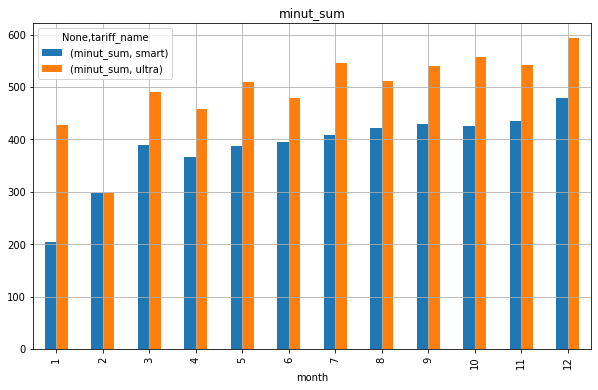

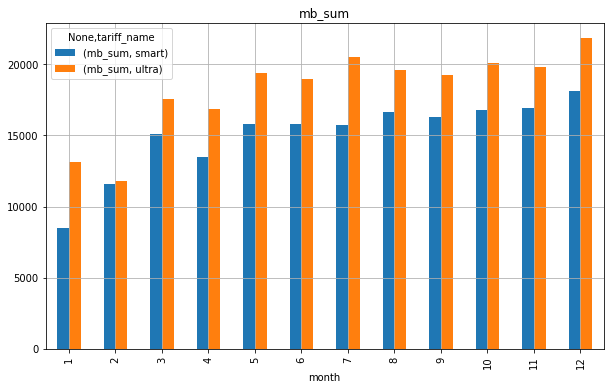

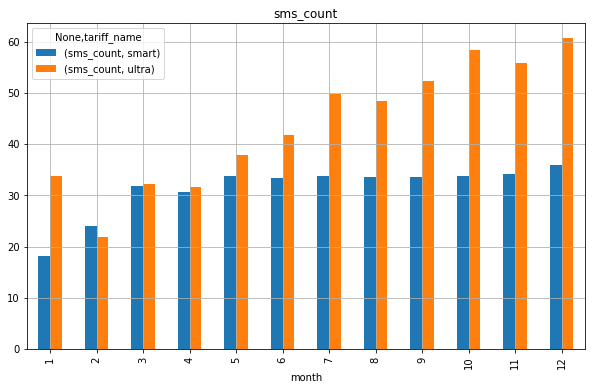

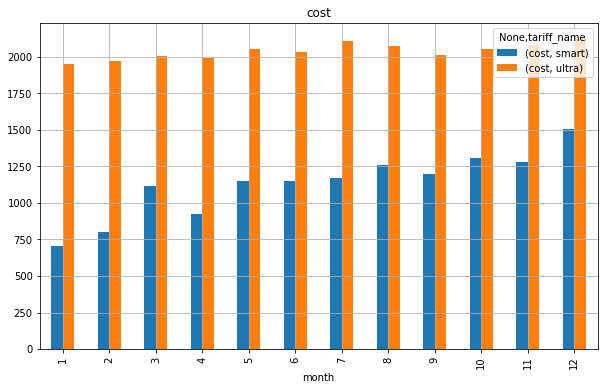

In [29]:
agglist_df =['minut_sum','mb_sum', 'sms_count', 'cost']
for i in agglist_df:
    pivot= df.sort_index().pivot_table(index = 'month', columns ='tariff_name', values = [i], aggfunc = 'mean')
    pivot.plot(kind ='bar',grid=True,ylim=0,figsize=(10,6))
    plt.title(i)
    plt.show()


- [картинка 1](img/img1.jpg)
- [картинка 2](img/img2.jpg)

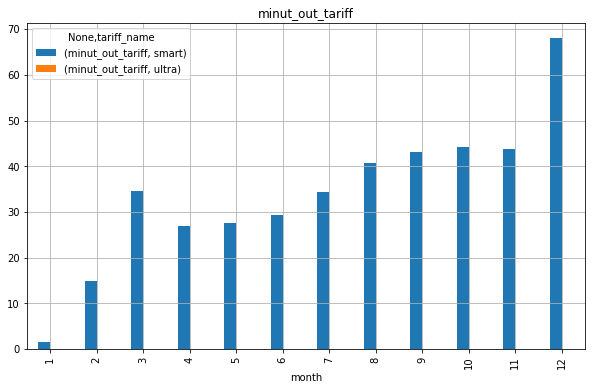

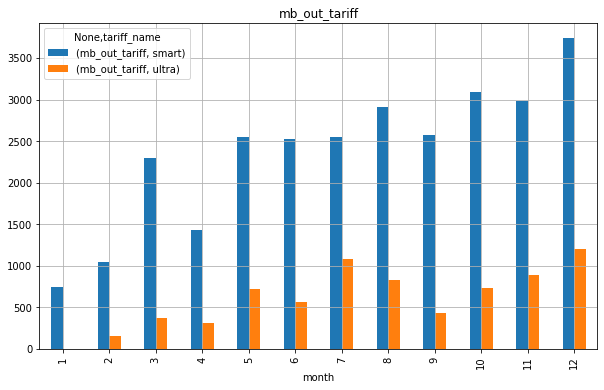

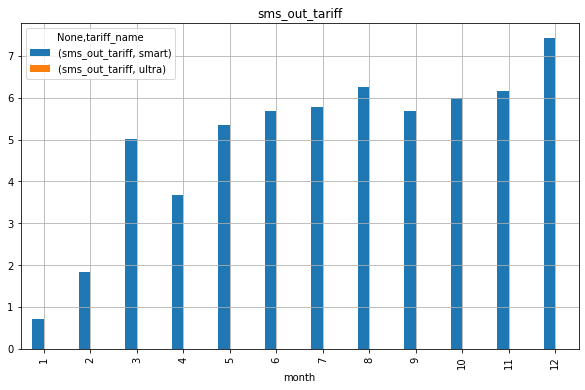

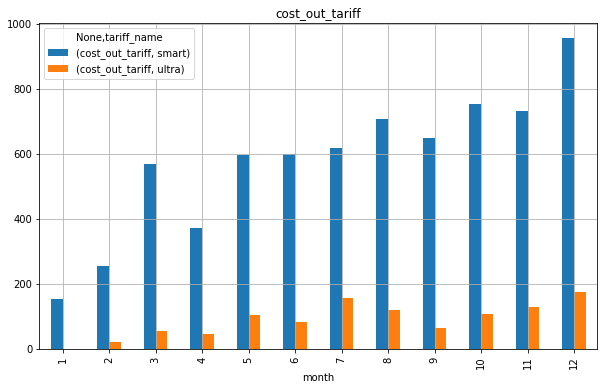

In [30]:
agglist_df2 =['minut_out_tariff','mb_out_tariff', 'sms_out_tariff', 'cost_out_tariff']
for i in agglist_df2:
    pivot= df.sort_index().pivot_table(index = 'month', columns ='tariff_name', values = [i], aggfunc = 'mean')
    pivot.plot(kind ='bar',grid=True,ylim=0,figsize=(10,6))
    plt.title(i)
    plt.show()


- [картинка 3](img/img3.jpg)
- [картинка 4](img/img4.jpg)

**Как возраст пользователя влияет на потребление услуг и выручку**

In [31]:
df['age_group'] = pd.qcut(df['age'],5)
df['age_group'].value_counts()

(17.999, 29.0]    695
(52.0, 64.0]      661
(41.0, 52.0]      643
(64.0, 75.0]      610
(29.0, 41.0]      605
Name: age_group, dtype: int64

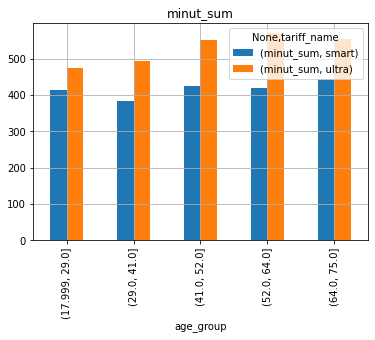

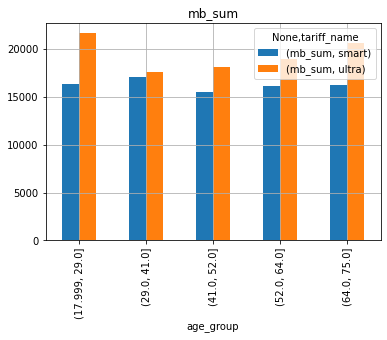

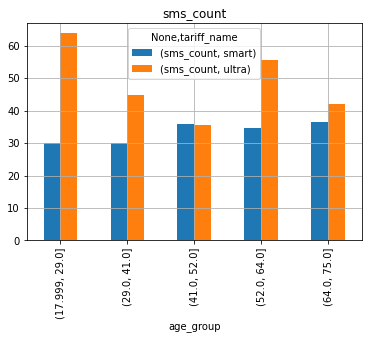

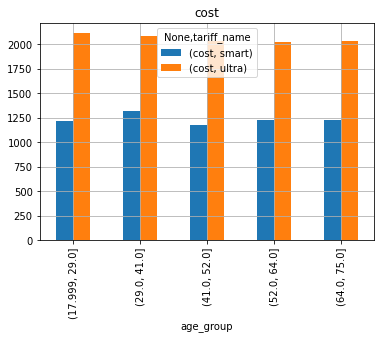

In [32]:
for i in agglist_df:
    pivot= df.sort_index().pivot_table(index = 'age_group', columns ='tariff_name', values = [i], aggfunc = 'mean')
    pivot.plot(kind ='bar',grid=True,ylim=0,figsize=(6,4))
    plt.title(i)
    plt.show()

- [картинка 5](img/img5.jpg)
- [картинка 6](img/img6.jpg)

In [33]:
ultra = df.query('tariff_name == "ultra"').pivot_table(index = ['user_id','month'], values =agglist_df, aggfunc = 'mean')
smart = df.query('tariff_name == "smart"').pivot_table(index = ['user_id','month'], values =agglist_df, aggfunc = 'mean')
ultra

cost  mb_sum  minut_sum  sms_count
user_id month                                       
1000    5      1950.00    2256        159         22
        6      1950.00   23257        172         60
        7      1950.00   14016        340         75
        8      1950.00   14070        408         81
        9      1950.00   14581        466         57
...                ...     ...        ...        ...
1495    8      1950.00    2616         92         13
        9      2299.37   33105        813         82
        10     1950.00   29393       1030         82
        11     3158.79   38972        954         79
        12     1950.00   23450       1031         84

[985 rows x 4 columns]

In [34]:
smart

cost  mb_sum  minut_sum  sms_count
user_id month                                       
1001    11     1153.91   18452        430          0
        12      550.00   14053        414          0
1002    6       550.00   10871        117          4
        7       987.70   17601        214         11
        8      1524.02   20347        289         13
...                ...     ...        ...        ...
1498    10     1574.22   20604        247         42
1499    9       550.00    1848         70         11
        10     1028.32   17809        449         48
        11     1425.50   17984        612         59
        12      598.00   13077        492         66

[2229 rows x 4 columns]

In [35]:
df_dict = {'ultra': ultra, 'smart': smart}

**средний расход услуг на пользователя в месяц**

In [36]:
means = pd.DataFrame(columns=['tariff','minut_sum','mb_sum', 'sms_count', 'cost'])
for k,v in df_dict.items():
    row = {col : v[col].mean() for col in agglist_df}
    row['tariff'] = k    
    means = means.append(pd.Series(row),ignore_index=True)
    
means = means.set_index('tariff', drop =True)
means

C:\Users\osia\AppData\Local\Temp\ipykernel_13920\465585237.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(pd.Series(row),ignore_index=True)
C:\Users\osia\AppData\Local\Temp\ipykernel_13920\465585237.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(pd.Series(row),ignore_index=True)


,minut_sum,mb_sum,sms_count,cost
tariff,,,,
ultra,526.62335,19486.901523,49.363452,2060.53
smart,417.934948,16229.188425,33.384029,1233.349412


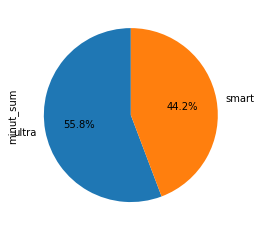

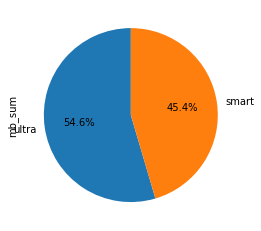

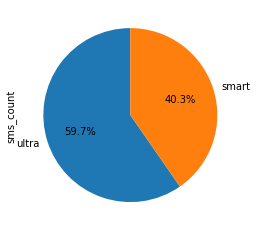

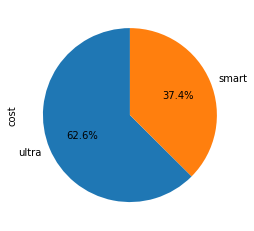

In [37]:
for i in agglist_df:
    means[i].plot(kind ='pie',label=i, autopct='%1.1f%%', startangle=90)
    plt.show()

- [картинка 7](img/img7.jpg)


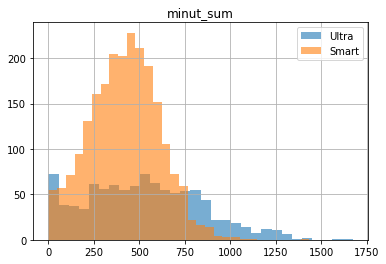

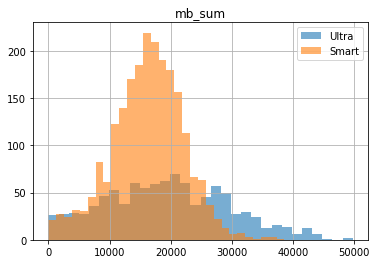

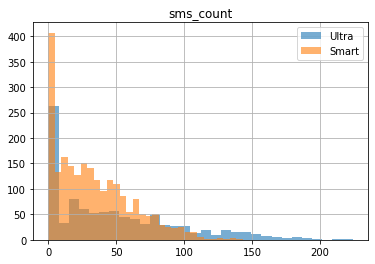

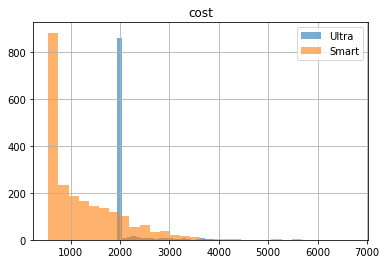

In [38]:
for i in agglist_df:
    ax1 = ultra[i].hist(grid=True, bins=30, alpha=0.6, label ='Ultra')
    ax2 = smart[i].hist(grid=True, bins=30, alpha=0.6, label ='Smart')
    ax1.legend(loc ='upper right')
    ax2.legend(loc ='upper right')
    plt.title(i)
    plt.show()


- [картинка 8](img/img8.jpg)

***Расчет общей выручки по тарифам за год***

In [39]:

summ = df.pivot_table(index = ['tariff_name'], values =['cost', 'cost_out_tariff'], aggfunc = 'sum')
summ

,cost,cost_out_tariff
tariff_name,,
smart,2749135.84,1523185.84
ultra,2029622.05,108872.05


**Вычисление дисперсиии**

In [40]:

variance = pd.DataFrame(columns=['tariff','minut_sum','mb_sum', 'sms_count', 'cost'])

for k,v in df_dict.items():
    row = {col : np.var(v[col]) for col in agglist_df}
    row['tariff'] = k    
    variance = variance.append(pd.Series(row),ignore_index=True)
    
variance = variance.set_index('tariff', drop =True)
variance

C:\Users\osia\AppData\Local\Temp\ipykernel_13920\4247152291.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variance = variance.append(pd.Series(row),ignore_index=True)
C:\Users\osia\AppData\Local\Temp\ipykernel_13920\4247152291.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variance = variance.append(pd.Series(row),ignore_index=True)


,minut_sum,mb_sum,sms_count,cost
tariff,,,,
ultra,100771.223617,101832133.108069,2282.946075,126824.406515
smart,36203.066652,34530412.73704,796.455483,620174.221377


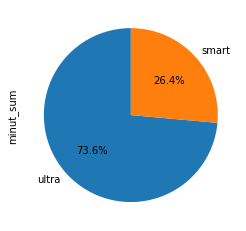

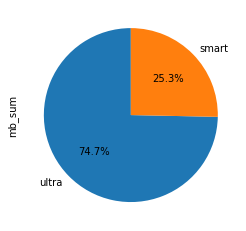

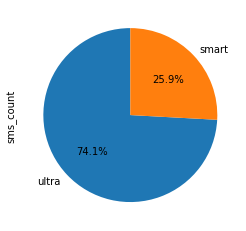

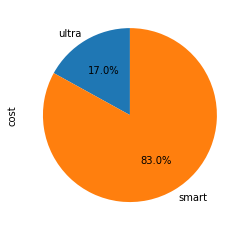

In [41]:
for i in agglist_df:
    variance[i].plot(kind ='pie',label=i, autopct='%1.1f%%', startangle=90)
    plt.show()

- [картинка 9](img/img9.jpg)

**Расчет стандартного отклонения**

In [42]:

std_deviation = pd.DataFrame(columns=['tariff','minut_sum','mb_sum', 'sms_count', 'cost'])
for k,v in df_dict.items():
    row = {col : np.std(v[col]) for col in agglist_df}
    row['tariff'] = k
    std_deviation = std_deviation.append(pd.Series(row),ignore_index=True)
std_deviation  = std_deviation.set_index('tariff', drop =True)
std_deviation

C:\Users\osia\AppData\Local\Temp\ipykernel_13920\3185112838.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_deviation = std_deviation.append(pd.Series(row),ignore_index=True)
C:\Users\osia\AppData\Local\Temp\ipykernel_13920\3185112838.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_deviation = std_deviation.append(pd.Series(row),ignore_index=True)


,minut_sum,mb_sum,sms_count,cost
tariff,,,,
ultra,317.444836,10091.190867,47.780185,356.124145
smart,190.271035,5876.258396,28.221543,787.51141


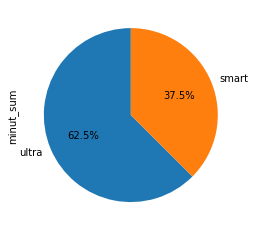

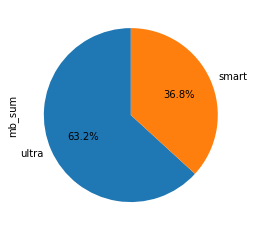

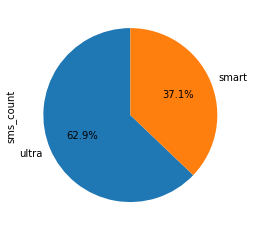

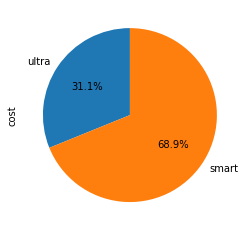

In [43]:
for i in agglist_df:
    std_deviation[i].plot(kind ='pie',label=i,autopct='%1.1f%%', startangle=90)
    plt.show()

- [картинка 10](img/img10.jpg)

**Поведение клиентов разных тарифов**

1. Во всех возрастных категориях пользователи ведут себя похоже
2. Пользователи тарифа smart чаще выходят за пределы включенных в абон.плату услуг
3. Суммарно за год пользователи тарифа Smart приносят больше выручку, но они менее предсказуемы в расходах, чем пользователи тарифа ultra
4. Пользователи тарифа смарт менее предсказуемые. Значимую часть выручки приносит плата за услуги вне тарифа


## Шаг 4. Проверьте гипотезы
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.
Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.


**Формулирование гипотез**



1. В условии даны альтернативные гипотезы H1:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
2. следовательно нулевые гипотезы H0 будут иметь вид:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается;
- средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов;

Пороговое значение alpha зададим стандартное 0,05

In [44]:
# Тест Левена для сравнения дисперсий. Если результат будет больше порога 0,05, то дисперсии можно считать равными
st.levene(ultra['cost'], smart['cost'])

LeveneResult(statistic=565.2564522021208, pvalue=3.135578626683539e-115)

Дисперсии выборок значимо отличаются, по этому при тесте Стьюдента устанавливаем параметр equal_var = False

In [45]:
alpha = 0.05

results = st.ttest_ind(ultra['cost'], smart['cost'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу -> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается")
else: 
    print("Не получилось отвергнуть нулевую гипотезу -> средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается")

p-значение: 8.930336877790441e-296
Отвергаем нулевую гипотезу -> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается


In [46]:
msk = df.query("city == 'москва'").pivot_table(index = ['user_id','month'], values =agglist_df, aggfunc = 'mean')
other = df.query("city != 'москва'").pivot_table(index = ['user_id','month'], values =agglist_df, aggfunc = 'mean')

results = st.ttest_ind(msk['cost'], other['cost'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу -> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов")
else: 
    print("Не получилось отвергнуть нулевую гипотезу -> средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов")

p-значение: 0.4549784322403716
Не получилось отвергнуть нулевую гипотезу -> средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов


**Вывод**

В диапазоне альфа-значения от 0.1 до 0.01 результат проверки гипотез не отличается:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов

### Шаг 5. Общий вывод

1. На этапе предобработки данных найдены следующие ошибки:
- При объединении агрегированных данных по разным услугам в одну таблицу выявлены пропуски, которые свидетельствуют о отсутствии расхода того или иного пакета услуг -> заменили на '0'
- После объединения агригированных данных по расходу услуг пользователями в месяц с данными о пользователях всплыло 2 пропуска-> предположим, что эти пользователи не использовали тариф/сим-карту, по этому заменили на '0'

2. Поведение клиентов разных тарифов
- Во всех возрастных категориях пользователи ведут себя похоже
- Пользователи тарифа smart чаще выходят за пределы включенных в абон.плату услуг
- Суммарно за год пользователи тарифа Smart приносят больше выручку, но они менее предсказуемы в расходах, чем пользователи тарифа ultra
- Пользователи тарифа смарт менее предсказуемые. Значимую часть выручки приносит плата за услуги вне тарифа

3. Проверены гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - гипотезу не отвергаем, различия есть
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - гипотезу отвергаем. Средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов

***Итог***
Исходя из проведененного анализа более прибыльным является тариф smart и считаю, что его продвижение принесет больше прибыли.